# Climatology

In this tutorial, we'll look at how to use wxee to calculate long-term climatological means of gridded weather data. wxee supports the following climatology methods which can be applied to an `ee.ImageCollection` using the `wx` accessor: `climatology_mean_dayofyear`, `climatology_mean_month`.

## Setup

In [1]:
import ee
import wxee

ee.Initialize()

## Monthly Total Rainfall

gridMET contains daily weather data including precipitation. First, we'll load 10 years of data from 2000 - 2010, giving us several thousand daily images.

In [2]:
gridmet = ee.ImageCollection("IDAHO_EPSCOR/GRIDMET").select("pr")
gridmet = gridmet.filterDate("2000", "2010")

gridmet.size().getInfo()

3653

Now, we'll calculate the monthly mean total rainfall over the 10 years, giving us just 12 images (one per month).

In [3]:
clim = gridmet.wx.climatology_mean_month(reducer=ee.Reducer.sum())
clim.size().getInfo()

12

<div class="alert alert-block alert-info">
<b>Tip:</b> The reducer argument defines how data will be aggregated before the mean climatology is calculated. In this case, we'll sum the daily precipitation to get monthly totals. The mean monthly climatology will be calculated from those totals.
</div>

Finally, we'll download the monthly mean totals as an xarray dataset and plot them.

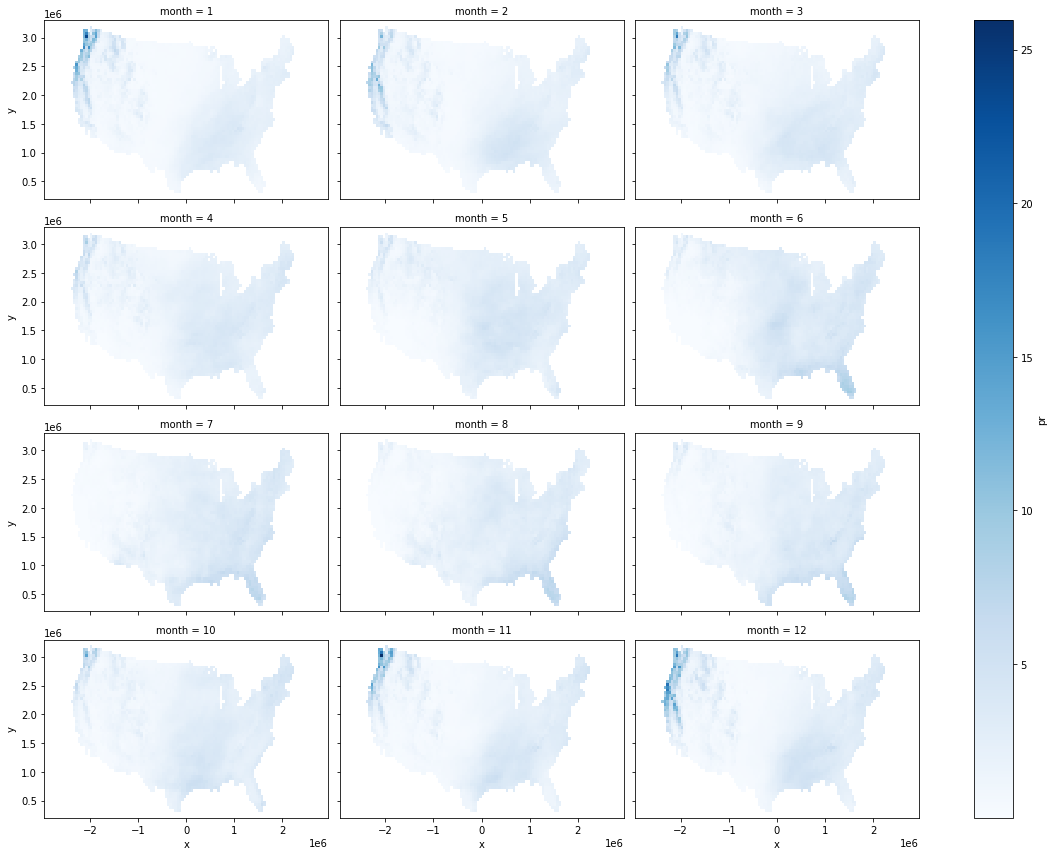

In [4]:
x = clim.wx.to_xarray(scale=50_000, crs="EPSG:5070")
x.pr.plot(col="month", col_wrap=3, figsize=(16, 12), cmap="Blues")

## Daily Mean Burning Index

Once again we'll look at gridMET daily weather data, but this time we'll calculate the climatological mean burning index (a measure of wildfire potential) by day-of-year. Day-of-year climatologies require processing a lot more data, so we'll just use 4 years for this example.

In [5]:
gridmet = ee.ImageCollection("IDAHO_EPSCOR/GRIDMET").select("bi")
gridmet = gridmet.filterDate("2000", "2004")

A day-of-year climatology will give 366 images, one for each day through the 4 years (including leap days).

In [6]:
clim = gridmet.wx.climatology_mean_dayofyear()
clim.size().getInfo()

366

We could download all 366 images, but maybe we're only interested in burning index for the month of August. We can use the `start` and `end` args to set the climatological window of days to look at. 

Here we'll set the `start` to 213 and the `end` to 243 (Aug. 1 and Aug. 31 in non-leap years). Now we only have 31 images.

In [7]:
clim = gridmet.wx.climatology_mean_dayofyear(start=213, end=243)
clim.size().getInfo()

31

<div class="alert alert-block alert-info">
<b>Tip:</b> Downloading is the slowest part of dealing with Earth Engine data in wxee, so it's always best to aggregate and filter your data before downloading.
</div>

Let's download them.

In [8]:
aug_bi = clim.wx.to_xarray(scale=50_000, crs="EPSG:5070")

And finally, we'll plot a timeline of 95th percentile burning index values over the CONUS.

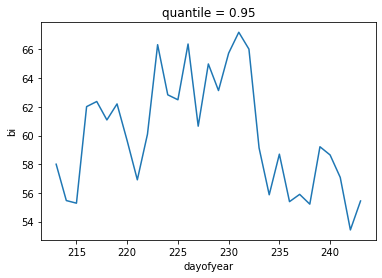

In [9]:
aug_bi.bi.quantile(0.95, ["x", "y"]).plot()